<a href="https://colab.research.google.com/github/Pankhuri33/UVrays_SPFAnalysis/blob/main/UV_SPF_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np
from datetime import datetime, timedelta

# Seed for reproducibility
random.seed(42)
np.random.seed(42)

# Cities with typical UV index ranges (approx.)
cities = {
    "Mumbai": (6, 12),
    "Delhi": (3, 11),
    "Chennai": (5, 11),
    "Bangalore": (4, 10),
    "Kolkata": (4, 10),
    "Hyderabad": (5, 11),
    "Pune": (4, 10),
    "Jaipur": (5, 11),
    "Ahmedabad": (6, 12),
    "Lucknow": (3, 9)
}

skin_types = ["I", "II", "III", "IV", "V", "VI"]

exposure_types = [
    "Indoor Work",
    "Daily Commute",
    "Walking in Shade",
    "Outdoor Sports",
    "Beach",
    "High Altitude Hiking"
]

# Function to get SPF recommendation
def recommend_spf(uv_index):
    if uv_index <= 2:
        return "SPF 15"
    elif uv_index <= 5:
        return "SPF 30"
    elif uv_index <= 7:
        return "SPF 30–50"
    elif uv_index <= 10:
        return "SPF 50+"
    else:
        return "SPF 50+ + protective gear"

# Generate data
data = []

for _ in range(500):
    city = random.choice(list(cities.keys()))
    uv_min, uv_max = cities[city]
    uv_index = round(np.random.uniform(uv_min, uv_max), 1)

    date = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 570))
    skin_type = random.choice(skin_types)
    exposure = random.choice(exposure_types)
    spf = recommend_spf(uv_index)

    data.append([date.date(), city, uv_index, skin_type, exposure, spf])

# Create DataFrame
df = pd.DataFrame(data, columns=[
    "Date", "City", "UV_Index", "Skin_Type", "Exposure_Type", "Recommended_SPF"
])

# Save to CSV
df.to_csv("uv_spf_data.csv", index=False)
print("✅ Dataset of 500 rows generated and saved as 'uv_spf_data.csv'")


✅ Dataset of 500 rows generated and saved as 'uv_spf_data.csv'


In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('/content/uv_spf_data.csv')

# Preview first 5 rows
df.head()

,Date,City,UV_Index,Skin_Type,Exposure_Type,Recommended_SPF
0,2023-01-26,Delhi,6.0,VI,Walking in Shade,SPF 30–50
1,2023-08-17,Bangalore,9.7,II,High Altitude Hiking,SPF 50+
2,2024-07-12,Delhi,8.9,I,Beach,SPF 50+
3,2023-02-02,Pune,7.6,I,Indoor Work,SPF 50+
4,2023-08-27,Bangalore,4.9,V,Beach,SPF 30


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month name for seasonal trends
df['Month'] = df['Date'].dt.month_name()

# Preview updated dataframe
df.head()

,Date,City,UV_Index,Skin_Type,Exposure_Type,Recommended_SPF,Month
0,2023-01-26,Delhi,6.0,VI,Walking in Shade,SPF 30–50,January
1,2023-08-17,Bangalore,9.7,II,High Altitude Hiking,SPF 50+,August
2,2024-07-12,Delhi,8.9,I,Beach,SPF 50+,July
3,2023-02-02,Pune,7.6,I,Indoor Work,SPF 50+,February
4,2023-08-27,Bangalore,4.9,V,Beach,SPF 30,August


EXPLORATORY DATA ANALYSIS

UV Index vs Recommended SPF

/tmp/ipython-input-8-2835114798.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Recommended_SPF', y='UV_Index', data=df, palette='coolwarm')


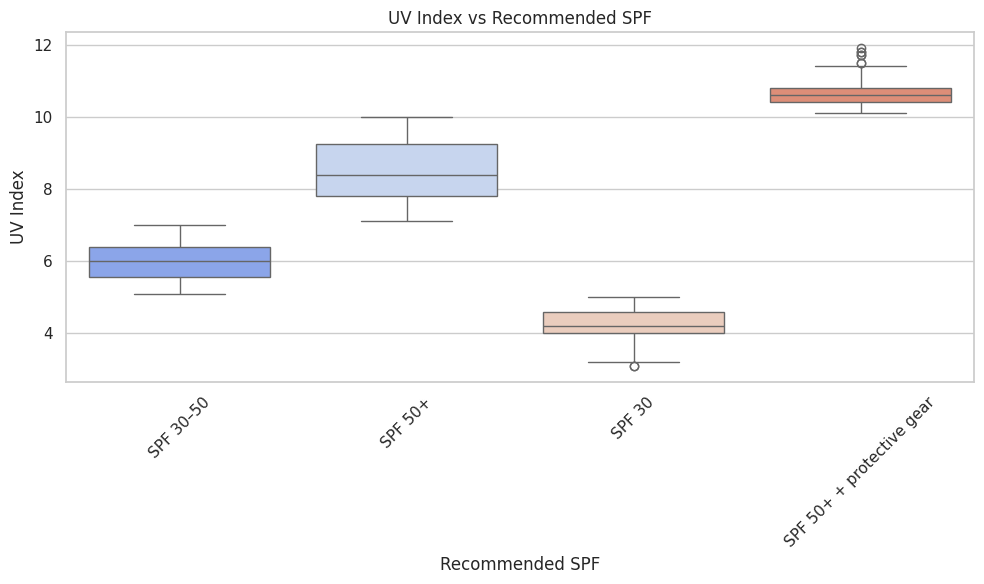

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot: UV Index vs Recommended SPF
sns.boxplot(x='Recommended_SPF', y='UV_Index', data=df, palette='coolwarm')
plt.title('UV Index vs Recommended SPF')
plt.xlabel('Recommended SPF')
plt.ylabel('UV Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

UV Index by Month (Seasonal Trends)

/tmp/ipython-input-9-576560645.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='UV_Index', data=df, order=[


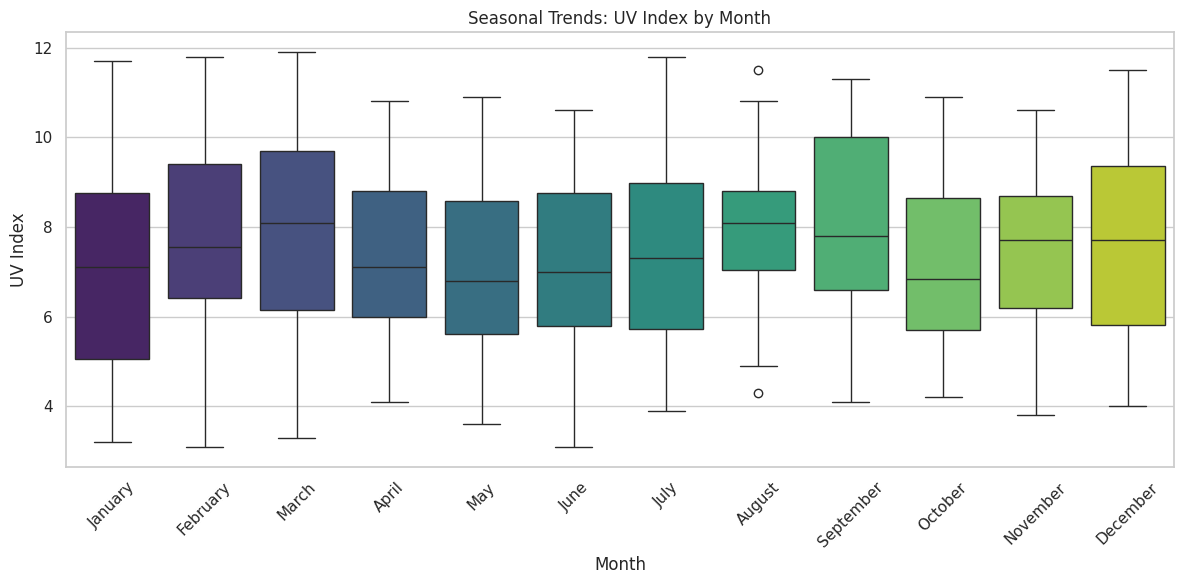

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot: UV Index by Month (Seasonal Trends)
sns.boxplot(x='Month', y='UV_Index', data=df, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], palette='viridis')

plt.title('Seasonal Trends: UV Index by Month')
plt.xlabel('Month')
plt.ylabel('UV Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

UV Index by City

/tmp/ipython-input-10-3648805807.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='UV_Index', data=df, palette='plasma')


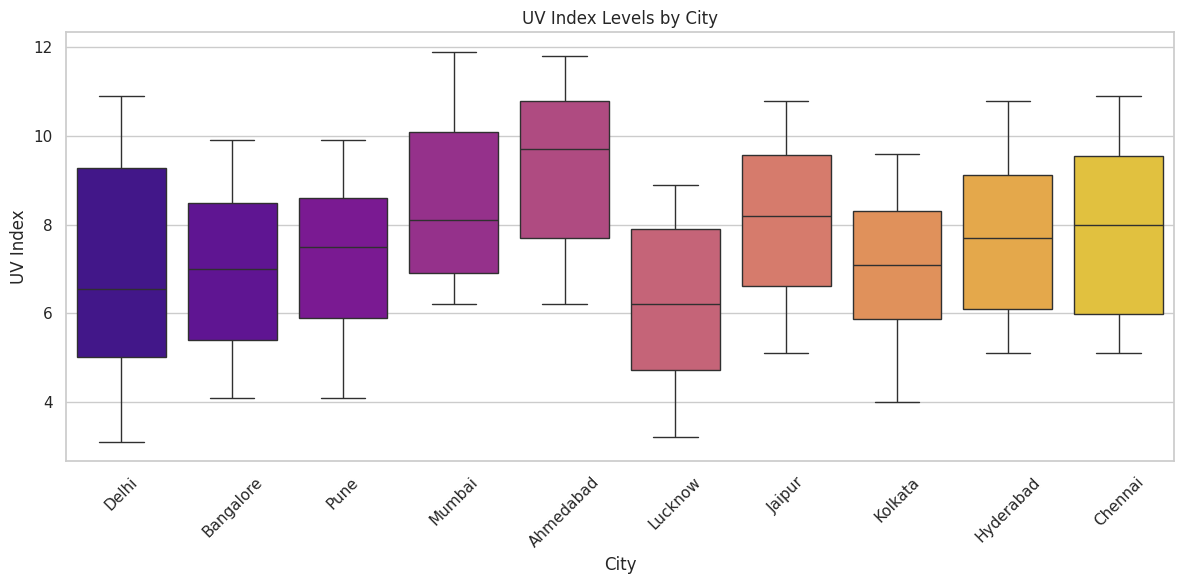

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot: UV Index by City
sns.boxplot(x='City', y='UV_Index', data=df, palette='plasma')
plt.title('UV Index Levels by City')
plt.xlabel('City')
plt.ylabel('UV Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Skin Type vs Recommended SPF

/tmp/ipython-input-11-2988726311.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Skin_Type', y='Recommended_SPF', data=df, palette='Set2')


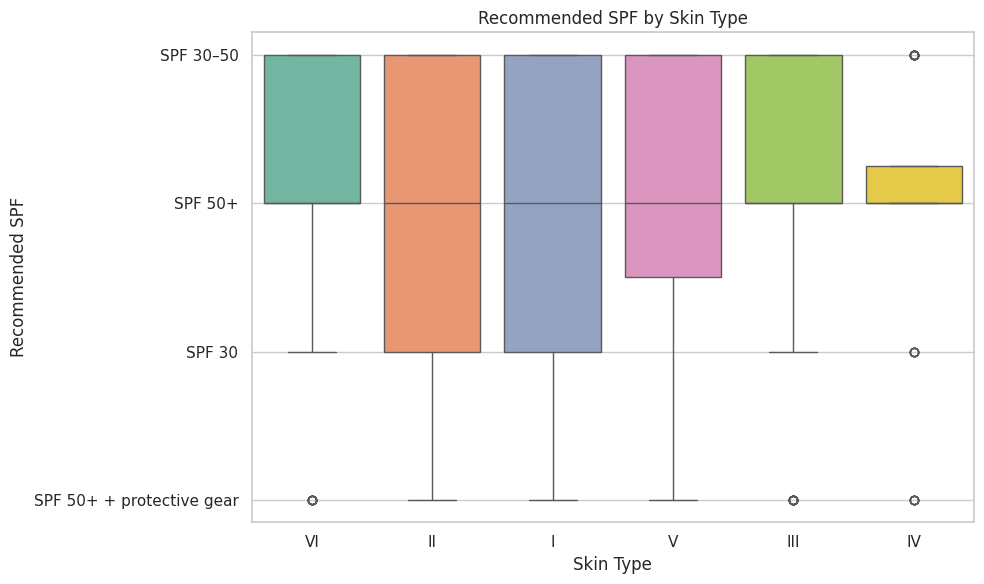

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot: Skin Type vs Recommended SPF
sns.boxplot(x='Skin_Type', y='Recommended_SPF', data=df, palette='Set2')
plt.title('Recommended SPF by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Recommended SPF')
plt.tight_layout()
plt.show()

Correlation Analysis

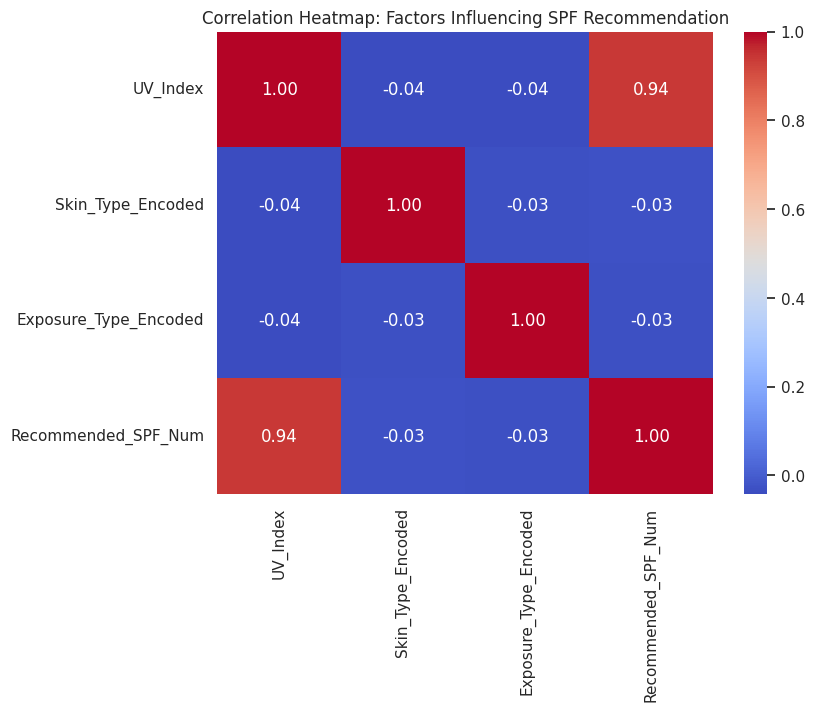

In [ ]:
# Copy the DataFrame and encode categorical variables
df_encoded = df.copy()

# Encode Skin_Type and Exposure_Type
df_encoded['Skin_Type_Encoded'] = df_encoded['Skin_Type'].astype('category').cat.codes
df_encoded['Exposure_Type_Encoded'] = df_encoded['Exposure_Type'].astype('category').cat.codes

# Encode SPF as numeric levels
spf_mapping = {
    'SPF 15': 15,
    'SPF 30': 30,
    'SPF 30–50': 40,
    'SPF 50+': 50,
    'SPF 50+ + protective gear': 60
}
df_encoded['Recommended_SPF_Num'] = df_encoded['Recommended_SPF'].map(spf_mapping)

# Correlation matrix
corr_data = df_encoded[['UV_Index', 'Skin_Type_Encoded', 'Exposure_Type_Encoded', 'Recommended_SPF_Num']]
corr_matrix = corr_data.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Factors Influencing SPF Recommendation')
plt.show()

Data Preprocessing

In [ ]:
# 1. Map Exposure_Type to numeric values
exposure_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'Very High': 4,
    'Extreme': 5
}
df['Exposure_Type_Encoded'] = df['Exposure_Type'].map(exposure_mapping)

# 2. Skin type already encoded (if not, do it again here)
skin_mapping = {
    'Type I (Very fair)': 1,
    'Type II (Fair)': 2,
    'Type III (Medium)': 3,
    'Type IV (Olive)': 4,
    'Type V (Brown)': 5,
    'Type VI (Dark Brown or Black)': 6
}
df['Skin_Type_Encoded'] = df['Skin_Type'].map(skin_mapping)

# 3. Define Features and Target
X = df[['UV_Index', 'Exposure_Type_Encoded', 'Skin_Type_Encoded']]
y = df['Recommended_SPF']

# 4. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Preprocessing completed. Shape of training data:", X_train.shape)

✅ Preprocessing completed. Shape of training data: (400, 3)


In [ ]:
# Convert Recommended_SPF to numerical labels
df['Recommended_SPF_Label'] = df['Recommended_SPF'].map({
    'SPF 15': 15,
    'SPF 30': 30,
    'SPF 50+': 50
})

In [ ]:
y = df['Recommended_SPF_Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(df['Recommended_SPF'].unique())

['SPF 30–50' 'SPF 50+' 'SPF 30' 'SPF 50+ + protective gear']


In [ ]:
df['Recommended_SPF'] = df['Recommended_SPF'].str.strip().str.upper()

df['Recommended_SPF_Label'] = df['Recommended_SPF'].map({
    'SPF 15': 15,
    'SPF 30': 30,
    'SPF 50+': 50
})

In [ ]:
df = df.dropna(subset=['Recommended_SPF_Label'])

In [ ]:
y = df['Recommended_SPF_Label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Clean 'Recommended_SPF' column and map to numeric
df['Recommended_SPF'] = df['Recommended_SPF'].str.strip().str.upper()

df['Recommended_SPF_Label'] = df['Recommended_SPF'].map({
    'SPF 15': 15,
    'SPF 30': 30,
    'SPF 50+': 50
})

# Step 2: Drop any rows with missing target values
df = df.dropna(subset=['Recommended_SPF_Label'])

# Step 3: Define features and target
X = df[['UV_Index', 'Exposure_Type_Encoded', 'Skin_Type_Encoded']]
y = df['Recommended_SPF_Label']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

# Step 5: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

/tmp/ipython-input-32-1128830796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recommended_SPF'] = df['Recommended_SPF'].str.strip().str.upper()
/tmp/ipython-input-32-1128830796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recommended_SPF_Label'] = df['Recommended_SPF'].map({


Training shape: (221, 3)
Testing shape: (56, 3)
Mean Squared Error: 0.0
R² Score: 1.0


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(actual_labels, predicted_labels)
print(f"Label-level Accuracy: {acc:.2f}")

Label-level Accuracy: 1.00


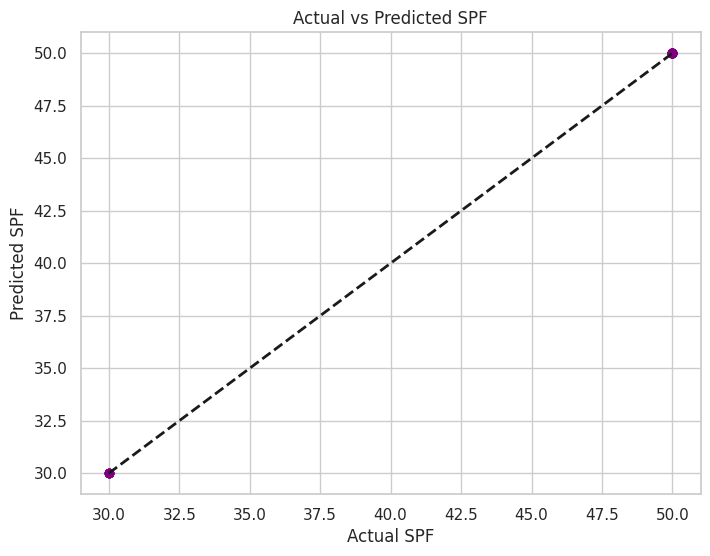

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual SPF')
plt.ylabel('Predicted SPF')
plt.title('Actual vs Predicted SPF')
plt.grid(True)
plt.show()

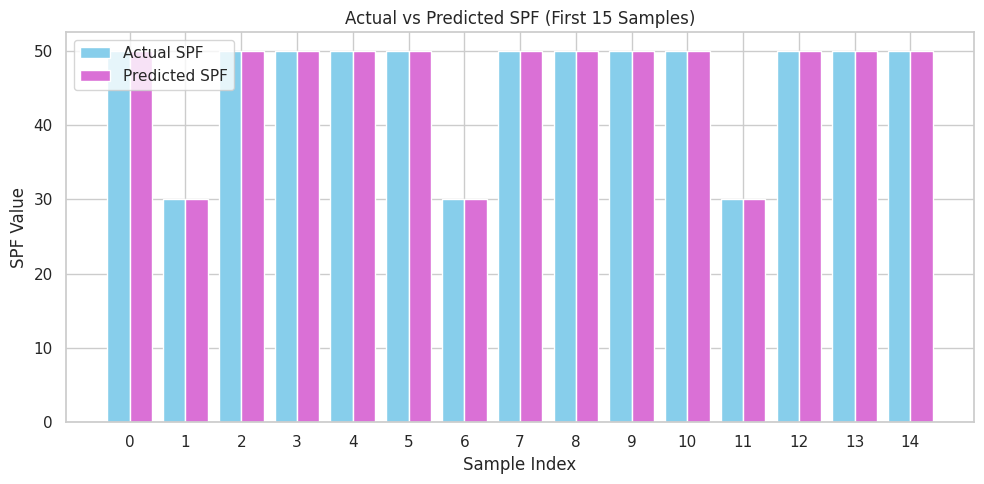

In [ ]:
import numpy as np

# Plot first 15 values for better visibility
n = 15
indices = np.arange(n)

plt.figure(figsize=(10, 5))
plt.bar(indices - 0.2, y_test.iloc[:n], width=0.4, label='Actual SPF', color='skyblue')
plt.bar(indices + 0.2, y_pred[:n], width=0.4, label='Predicted SPF', color='orchid')
plt.xlabel('Sample Index')
plt.ylabel('SPF Value')
plt.title('Actual vs Predicted SPF (First 15 Samples)')
plt.xticks(indices)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
def map_spf_label(value):
    if value <= 20:
        return 'SPF 15'
    elif value <= 40:
        return 'SPF 30'
    else:
        return 'SPF 50+'

In [ ]:
# Convert predicted values to labels
predicted_labels = pd.Series(y_pred).apply(map_spf_label)

# Convert actual values to labels (assuming your original `y_test` was numeric)
actual_labels = y_test.apply(map_spf_label)

<Figure size 600x500 with 0 Axes>

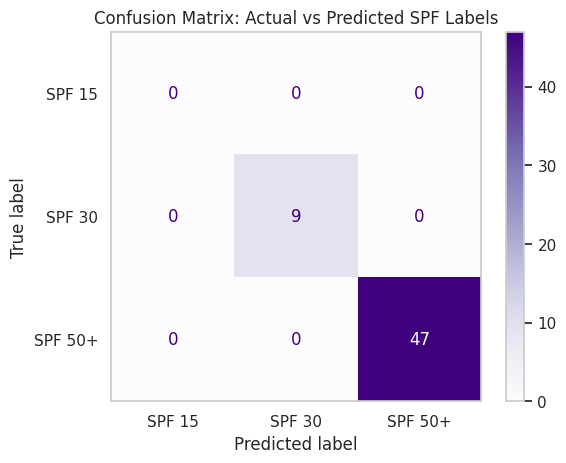

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(actual_labels, predicted_labels, labels=['SPF 15', 'SPF 30', 'SPF 50+'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SPF 15', 'SPF 30', 'SPF 50+'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Purples')
plt.title("Confusion Matrix: Actual vs Predicted SPF Labels")
plt.grid(False)
plt.show()

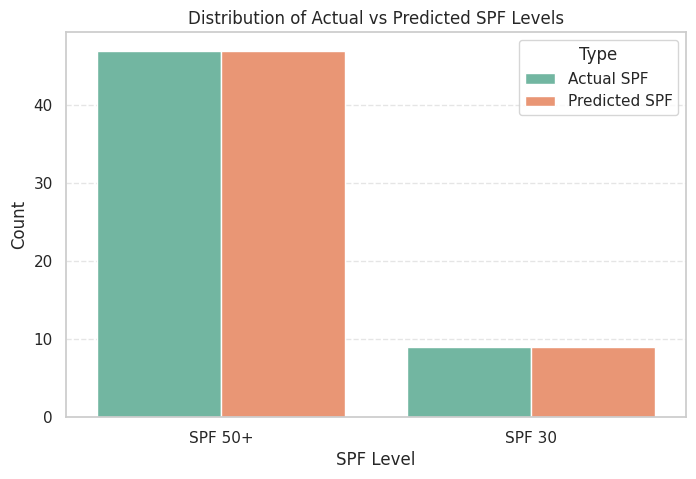

In [ ]:
import seaborn as sns

# Create a dataframe for plotting
compare_df = pd.DataFrame({
    'Actual SPF': actual_labels,
    'Predicted SPF': predicted_labels
})

plt.figure(figsize=(8, 5))
compare_df_melted = compare_df.melt(var_name='Type', value_name='SPF Level')

sns.countplot(data=compare_df_melted, x='SPF Level', hue='Type', palette='Set2')
plt.title("Distribution of Actual vs Predicted SPF Levels")
plt.ylabel("Count")
plt.xlabel("SPF Level")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

 Feature Importance (Model Explainability)
Finding  out which factors (UV, skin type, exposure) most influenced SPF prediction.

/tmp/ipython-input-39-728262119.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


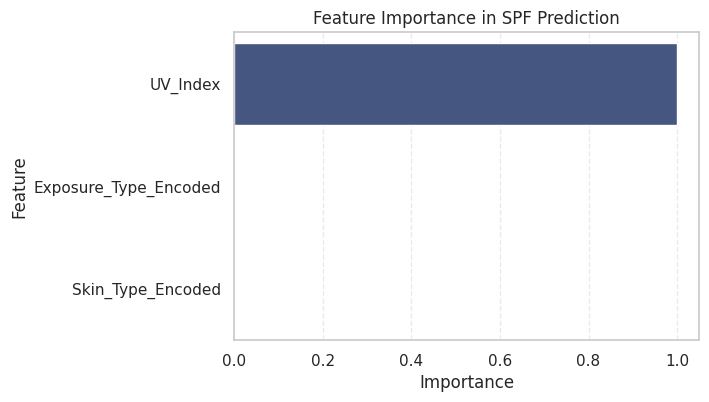

In [ ]:
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance in SPF Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.show()

In [ ]:
import pickle

with open("spf_recommendation_model.pkl", "wb") as f:
    pickle.dump(model, f)